In [ ]:
!pip install yfinance pandas requests bs4 matplotlib

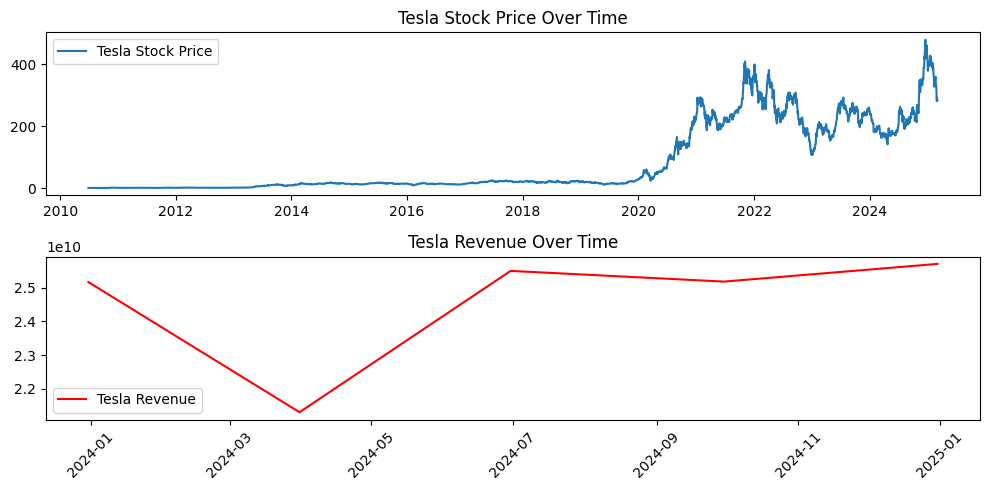

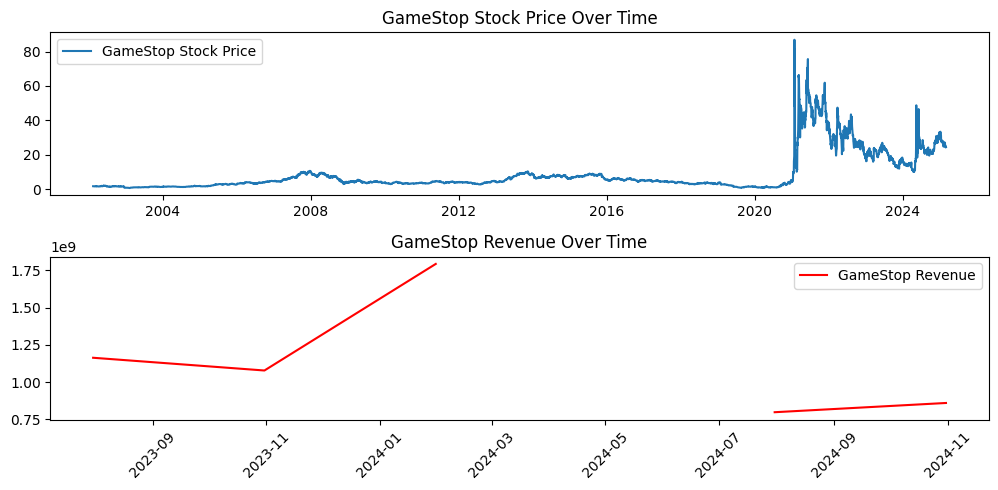

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Use yfinance to Extract Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.to_csv("tesla_stock_data.csv")

# Fetch Tesla's quarterly revenue
tesla_financials = tesla.quarterly_income_stmt
tesla_revenue = tesla_financials.loc["Total Revenue"].T  # Transpose

# Reset index to get 'Date' column
tesla_revenue = tesla_revenue.reset_index()
tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns
tesla_revenue.to_csv("tesla_revenue_data.csv", index=False)

# Fetch GameStop's stock & revenue data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.to_csv("gme_stock_data.csv")

gme_financials = gme.quarterly_income_stmt
gme_revenue = gme_financials.loc["Total Revenue"].T.reset_index()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.to_csv("gme_revenue_data.csv", index=False)

# ✅ Fix the plotting issue
plt.figure(figsize=(10, 5))

# Tesla Stock Price
plt.subplot(2, 1, 1)
plt.plot(tesla_data.index, tesla_data['Close'], label="Tesla Stock Price")
plt.legend()
plt.title("Tesla Stock Price Over Time")

# Tesla Revenue
plt.subplot(2, 1, 2)
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'].astype(float), label="Tesla Revenue", color='red')
plt.legend()
plt.title("Tesla Revenue Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("tesla_dashboard.png")
plt.show()

# ✅ Fix GameStop Dashboard
plt.figure(figsize=(10, 5))

# GameStop Stock Price
plt.subplot(2, 1, 1)
plt.plot(gme_data.index, gme_data['Close'], label="GameStop Stock Price")
plt.legend()
plt.title("GameStop Stock Price Over Time")

# GameStop Revenue
plt.subplot(2, 1, 2)
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'].astype(float), label="GameStop Revenue", color='red')
plt.legend()
plt.title("GameStop Revenue Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("gme_dashboard.png")
plt.show()


In [10]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
tesla_revenue.tail()

,Date,Revenue
2,2024-06-30,25500000000.0
3,2024-03-31,21301000000.0
4,2023-12-31,25167000000.0
5,2023-09-30,NaN
6,2023-06-30,NaN


In [12]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [13]:
gme_revenue.tail()

,Date,Revenue
1,2024-07-31,798300000.0
2,2024-04-30,NaN
3,2024-01-31,1793600000.0
4,2023-10-31,1078300000.0
5,2023-07-31,1163800000.0
